# Basic neural network learning

This notebook introduces the backpropagation algorithm on a simple task, namely classifying iris flowers based on some of their characteristics. We also point out the importance of the bias term in neural nets by leaving it out for this example and observing its influence on the final outcome.


In [64]:
import numpy as np
import torch
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

First, we need to load the data. The Iris dataset is a very popular one for machine learning classifications. It contains 150 entries, corresponding to 3 classes. Each of the 3 iris types has 50 occurences in the dataset. For each sample we have 4 features available: sepal length, sepal width, petal length, petal width.

In [65]:
# load the "Iris" dataset: https://archive.ics.uci.edu/ml/datasets/iris
data = load_iris()
# Extract data and labels from the dataset
X=data.data
y=data.target
# Split the data in a 80-20 ratio for train-test, respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [66]:
# Set the hyperparameters
iterations = 5000
N = y_train.size

# Setting the network's dimensions
input_size = 4 # corresponding to the 4 input features
hidden_size = 3
output_size = 3 # corresponding to the 3 target classes

# We will store the results in a pd.DataFrame for easier post-processing
results = pd.DataFrame(columns=["mse", "accuracy"])

Defining auxiliary functions.

In [67]:
# Defining accuracy
def accuracy(y_pred, y_true):
  acc = (y_pred.argmax(axis=1) == y_true.argmax(axis=1)).type(torch.FloatTensor)
  return acc.mean()

# Defining one-hot encoding
def one_hot(x):
  result = np.zeros((x.size, x.max()+1))
  result[np.arange(x.size), x] = 1
  return result

Defining the neural network model.

In [68]:
torch_model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.Sigmoid(),
    torch.nn.Linear(hidden_size, output_size),
    torch.nn.Sigmoid()
)

Defining neural network training parameters.

In [69]:
loss_func = torch.nn.MSELoss() #Choosing mean square error as loss metric
learning_rate = 0.01
optimizer = torch.optim.SGD(torch_model.parameters(), lr=learning_rate)

Training the model.

In [70]:
# Transform the labels into one-hot encoded vectors
one_hot_y_train = torch.from_numpy(one_hot(y_train)).type(torch.FloatTensor)
one_hot_y_test = torch.from_numpy(one_hot(y_test)).type(torch.FloatTensor)

mse_list = []
acc_list = []

for itr in range(iterations):
  # Forward propagate the input through the first layer
  out = torch_model(torch.from_numpy(X_train).type(torch.FloatTensor))
  loss = loss_func(out, one_hot_y_train)
  acc = accuracy(out, one_hot_y_train)

  mse_list.append(loss.detach().numpy())
  acc_list.append(acc)

  loss.backward()
  optimizer.step()

Test the model by running forward propagation on the test dataset.

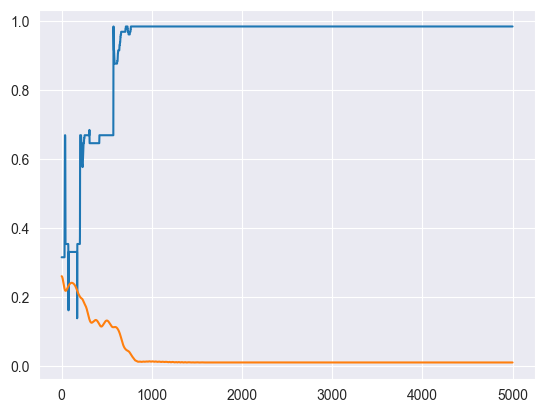

Accuracy: 0.949999988079071


In [71]:
# Rulam modelul antrenat pe baza de date de test
out_test = torch_model(torch.from_numpy(X_test).type(torch.FloatTensor))

acc = accuracy(out_test, one_hot_y_test)
plt.plot(np.arange(iterations), acc_list)
plt.plot(np.arange(iterations), mse_list)
plt.show()
print("Accuracy: {}".format(acc))